### PREREQUISITE: Make sure thanhhoa_processed.csv is located in data/processed. If not, run script files

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "../data/processed/thanhhoa_processed.csv"
df = pd.read_csv(path, index_col="STT") # I didn't declare SBD and MA_TINH as `dtype = str` here, because no entries begin with leading zeros

df[df["SBD"] == 28002212]

,SBD,MA_TINH,TOAN,VAN,LI,HOA,SINH,SU,DIA,KTPL,T_ANH,A00,A01,B00,C00,D01
STT,,,,,,,,,,,,,,,,
572547,28002212,28,10.0,8.25,9.75,NaN,NaN,NaN,NaN,NaN,9.75,NaN,29.5,NaN,NaN,28.0


(too lazy ima write in vnmese)
# So sánh phân phối môn thi

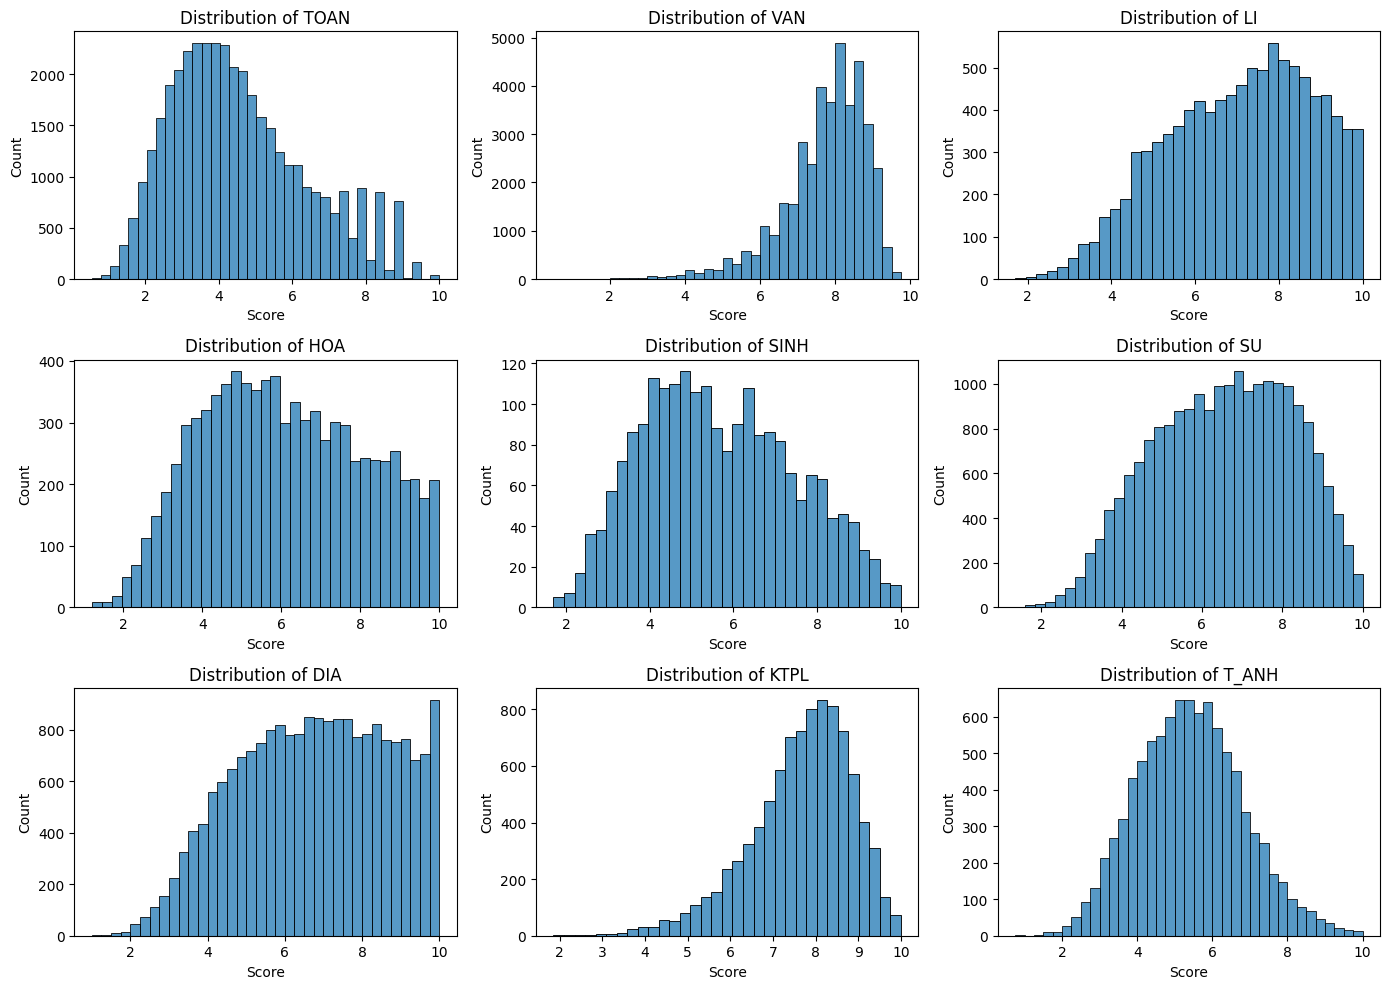

In [112]:
subjects = ["TOAN", "VAN", "LI", "HOA", "SINH", "SU", "DIA", "KTPL", "T_ANH"]

fig, axes = plt.subplots(3, 3, figsize=(14, 10))  # 2x2 grid of plots

for ax, subj in zip(axes.flat, subjects):
    sns.histplot(df[subj], kde=False, bins=30, ax=ax, binwidth=0.25)
    ax.set_title(f"Distribution of {subj}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

Takeaway:
- Test difficulty is not standardized across subjects. Some are left-skewed (TOAN - Math), while some are right-skewed (KTPL - Econs and Law).
- T_ANH shows textbook bell-curve distribution => good
=> 

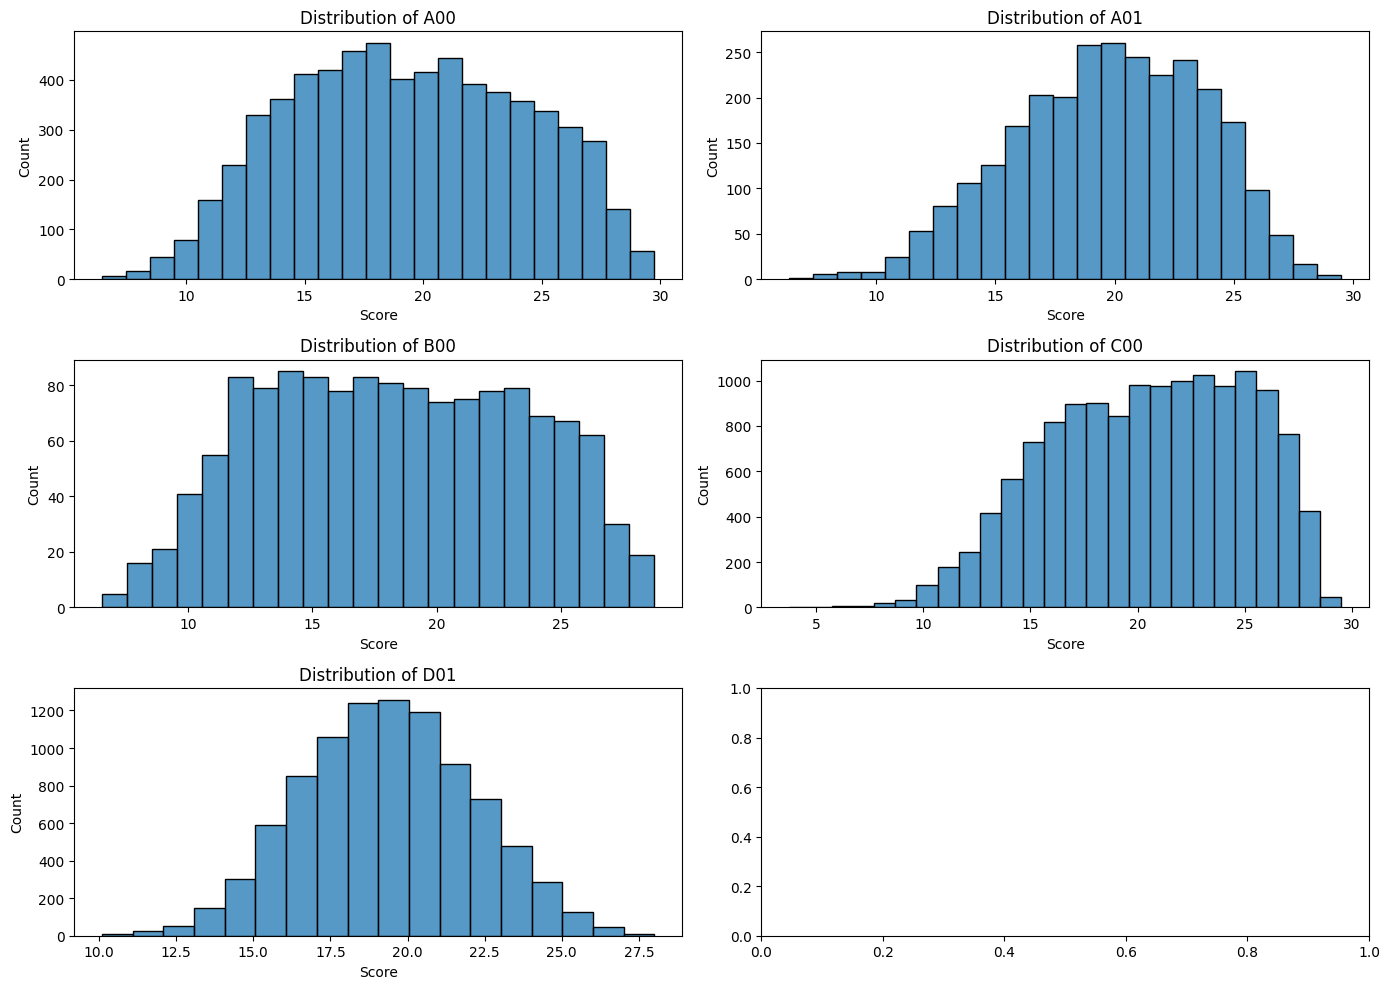

In [113]:
subjects = ["A00", "A01", "B00", "C00", "D01"]

fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 2x2 grid of plots

for ax, subj in zip(axes.flat, subjects):
    sns.histplot(df[subj], kde=False, bins=30, ax=ax, binwidth=1)
    ax.set_title(f"Distribution of {subj}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

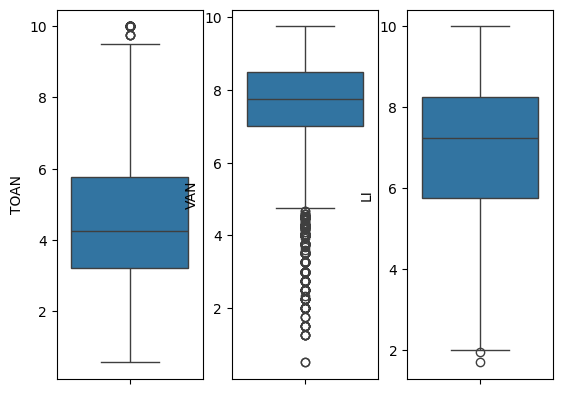

In [114]:
subjects = ["TOAN", "VAN", "LI", "HOA", "SINH", "SU", "DIA", "KTPL", "T_ANH"]

# fig, axes = plt.subplots(3, 3, figsize=(14, 10))  # 2x2 grid of plots

# for ax, subj in zip(axes.flat, subjects):
    # sns.boxplot(df[subj])
    # ax.set_title(f"Distribution of {subj}")
    # ax.set_xlabel("Score")
    # ax.set_ylabel("Count")

# plt.tight_layout()

plt.subplot(1,3,1)
sns.boxplot(df["TOAN"])

plt.subplot(1,3,2)
sns.boxplot(df["VAN"])

plt.subplot(1,3,3)
sns.boxplot(df["LI"])

plt.show()

# Correlation matrix (no normalization)

           TOAN       VAN        LI       HOA      SINH        SU       DIA  \
TOAN   1.000000  0.346795  0.765933  0.758622  0.797644  0.531947  0.566329   
VAN    0.346795  1.000000  0.178736  0.151447  0.297940  0.568529  0.565096   
LI     0.765933  0.178736  1.000000  0.770334  0.509144  0.423493  0.386960   
HOA    0.758622  0.151447  0.770334  1.000000  0.764584  0.382722  0.628080   
SINH   0.797644  0.297940  0.509144  0.764584  1.000000  0.472582  0.608335   
SU     0.531947  0.568529  0.423493  0.382722  0.472582  1.000000  0.795184   
DIA    0.566329  0.565096  0.386960  0.628080  0.608335  0.795184  1.000000   
KTPL   0.414425  0.449889  0.586446  0.539117  0.458764  0.592390  0.579421   
T_ANH  0.537233  0.158618  0.502724  0.558947  0.465509  0.356211  0.342360   

           KTPL     T_ANH  
TOAN   0.414425  0.537233  
VAN    0.449889  0.158618  
LI     0.586446  0.502724  
HOA    0.539117  0.558947  
SINH   0.458764  0.465509  
SU     0.592390  0.356211  
DIA    0.5794

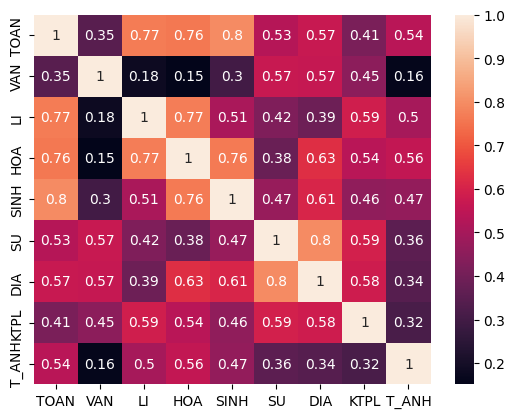

In [ ]:
subjects = ["TOAN", "VAN", "LI", "HOA", "SINH", "SU", "DIA", "KTPL", "T_ANH"]

correlation_matrix = df[subjects].corr()
print(correlation_matrix)

plt.figure()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### Insights

- No negative correlation => ...
- Students perform well on TOAN (Math) are likely to perform well on Natural Science subjects: LI (Physics), HOA (Chemistry), SINH (Biology). But no high correlation between Physics and Biology. 
- Also notable high corr: SU (History) and DIA (Geography)